# Notebook 2:  Clustering con Modelo de Mezclas de Normales (GMM)

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio considerando el uso de un función que permita medir la calidad del agrupamiento cuando se conocen los grupos de cada observación.

In [3]:
#install.packages("mclust")
#install.packages("cluster")
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
summary(datos)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       177.3167 210 93 -142.6475 -157.7975

Clustering table:
 1  2  3  4 
67 75 23 45 

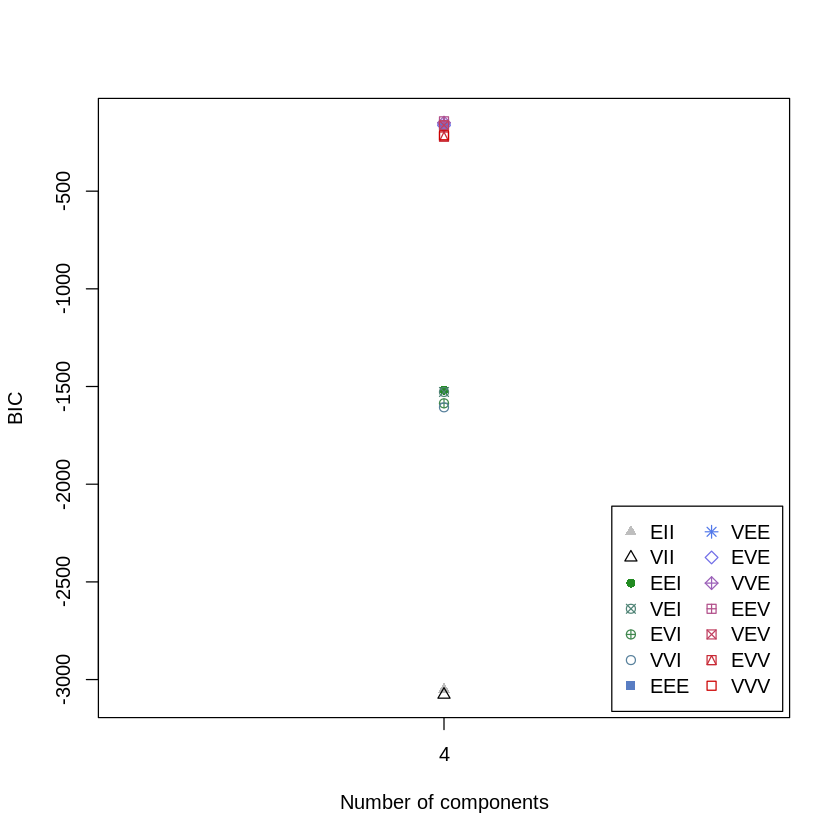

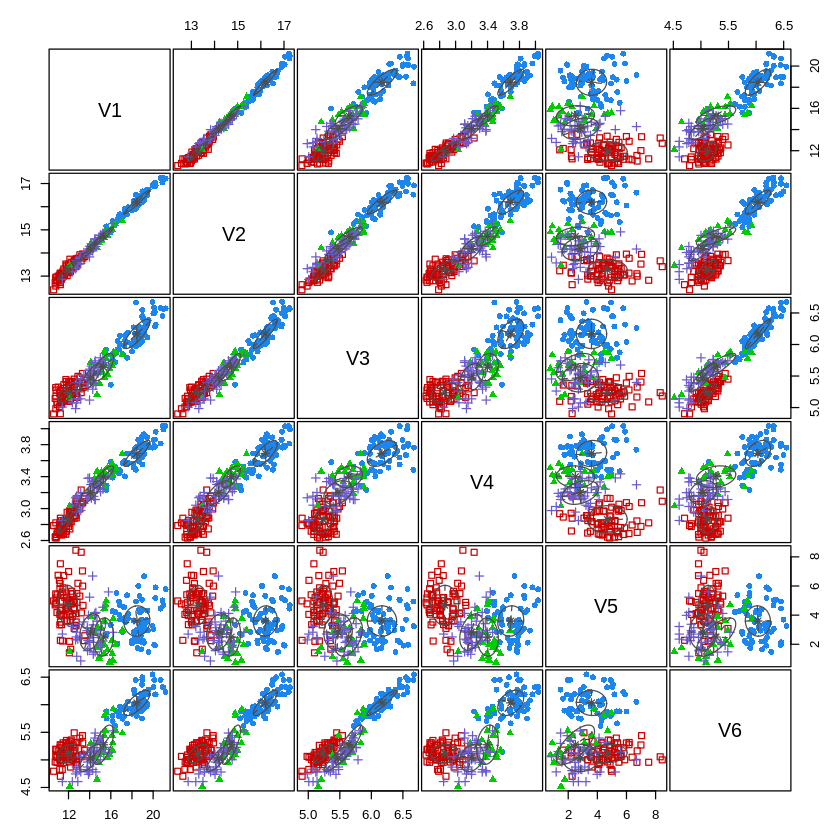

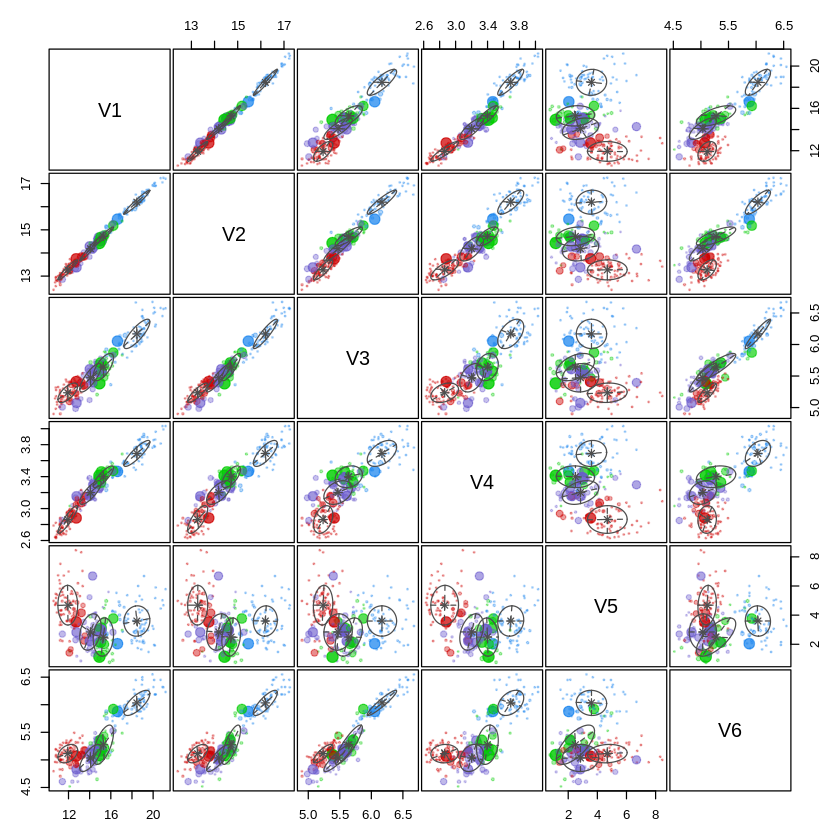

'Mclust' model object: (EEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

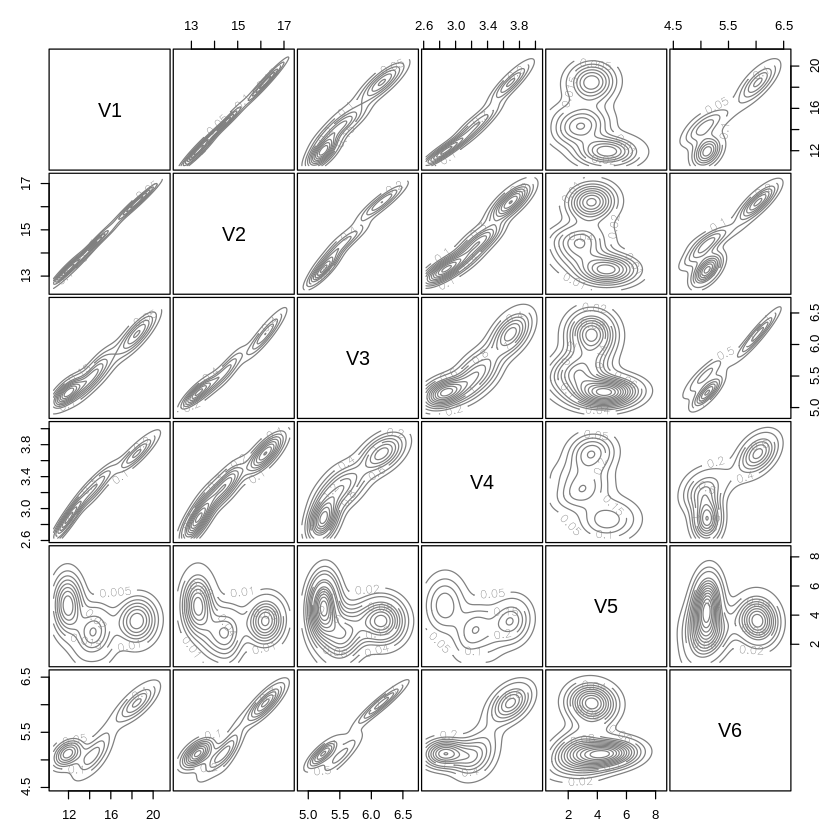

In [4]:
clus <-Mclust(datos, G = 4)
summary(clus)
plot(clus)
clus




In [5]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers


V1,V2,V3,V4,V5,V6
18.46213,16.19470,6.167813,3.690301,3.596481,6.033091
11.93175,13.27016,5.234781,2.863010,4.682985,5.113286
15.29414,14.71759,5.641832,3.398164,2.495003,5.274619
14.07522,14.18237,5.472207,3.200684,2.842341,5.035122


**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.
- El metodo Mclust, permite ajustar el modelo de mezclas normales para un conjunto de datos como entrada, estos datos son las variables involucradas de acuerdo a normales multivariadas. El modelo es estimado usando el algoritmo EM.

#### Parametros de entrada:
- Data: los datos de las variables para hacer clustering
- G: numero de grupos, si no se agreda el metodo evalua la cantidad de grupos a considerar.
- modelNames: Modelos de covarianza que puede utilizar. Hay 14 posibles, en caso de no agregar este valor, el modelo prueba con todos y selecciona el que tiene el BIC optimo.
    - "EII": esférica de igual volumen.
    - "VII": esférica volumen variable.
    - "EEI": diagonal de igual volumen y forma.
    - "VEI": diagonal, volumen variable, de igual forma. 
    - "EVI": diagonal, de igual volumen y  forma variable.
    - "VVI": diagonal, de  volumen y  forma variable.
    - "EEE": elipsoidal, de igual volumen, forma y orientación
    - "VEE": elipsoidal, volumen variable, de igual forma y orientación
    - "EVE": elipsoidal, de igual volumen y orientación, forma variable
    - "VVE": elipsoidal,  volumen y forma variable e igual orientación
    - "EEV": elipsoidal,  de igual volumen y forma variable y orientación variable.
    - "VEV": elipsoidal,  volumen y orientación variable e igual forma.
    - "EVV": elipsoidal,  orientación y forma variable e igual volumen.
    - "VVV": elipsoidal,  volumen, forma y orientación variables.
- prior (opcional): permite especificar una distribución apriori conjugada de las medias y varianzas.
- control: Lista de parametros de control para EM.
- Initialization: parametros para el clustering
- warn: Valor logico que indica si se deben emitir advertencias.
- x: Un objeto de la clase 'mclustBIC'. Si se proporcionan los valores de BIC de los modelos ya calculados, estos no se vuelven a calcular y se ignoran los valores establecidos, excepto G y modelName que son tomados de x.

    
#### Parametros de salida
- La salida es un objeto de la clase Mclust, que contiene los siguientes datos:
    - data: Matriz con los datos de entrada.
    - modelName: String que describe, que modelo de covarianza obtuvo el BIC optimo.
    - n: Numero de observaciones en los datos.
    - d: Dimensión de los datos.
    - G: El numero optimo de grupos, si es que no se especifico en la entrada.
    - BIC: Valor de BIC para el modelo seleccionado. También puede ser una matriz si se evaluaron varios modelos.
    - loglik: Log de la verosimilitud del modelo ajustado.
    - df: Cantidad de parametros estimados.
    - bic: Valor BIC final del modelo seleccionado (mejor entre todos).
    - icl: Un criterio similar a BIC que penaliza más la incertidumbre.
    - hypvol: Volumen hiperdimensional de los clusters (en modelos Gaussianos).
    - parameters: Lista con parámetros del modelo: medias (mean), varianzas (variance) y proporciones (pro).
    - z: Matriz n×G con las probabilidades de pertenencia de cada punto a cada cluster.
    - classification: Vector con la asignación de cluster para cada observación (el más probable).
    - uncertainty: Vector con la incertidumbre de cada asignación. Cuanto más cerca de 0, más segura es la asignación.


b) Interprete y comente los resultados obtenidos.

datos que es un matriz de observaciones y G (cluster a utilizar) en este caso se condiciona a que sean 4 (G=4), si no se agrega G, el método selecciona 2  cluster como resultado.
- De los parametros de salida podemos interpretar lo siguiente:

    - Se ha ajustado a un modelo de mezcla gaussiana usando el algoritmo EM (Expectation - Maximation)
    - A elegido EEV con 4 componentes Cluster (predefinidos), este modelo indica que los cluster pueden ser de igual tamaño y con elipses similares en volumen y orientación.
    - El BIC maximo (menos negativo) fue el modelo de covarianza EEV, BIC = -142.6475.
    - Los parametros estimados fueron df = 93.
    - n = 210,  muestra el numero total de observaciones.
    -
- El modelo asigno los 210 observaciones entre los 4 cluster de la forma 
    - Cluster 1 -> 67 observaciones
    - Cluster 2 -> 75 observaciones
    - Cluster 3 -> 23 observaciones
    - Cluster 4 -> 45 observaciones

A partir del k=4 podemos decir que en el grupo 1 se observa una mayor media en los datos de las variable V1,V2, V3, V4 y V6. Mientras que los mayores valores para V5 se encuentran en el grupo 2. En el grupo dos podemos encontrarnos con las medias menores para V1, V2, V3 y V4. Los grupos 3 y 4 tienen las medianas de las variables menos para v5 y v6, donde se encuentran los menores para en 3 (V5) y 4 (V6) respectivamente. Esto nos permite afirmar que hay una caracterización de los datos en los grupos 1 y 2.


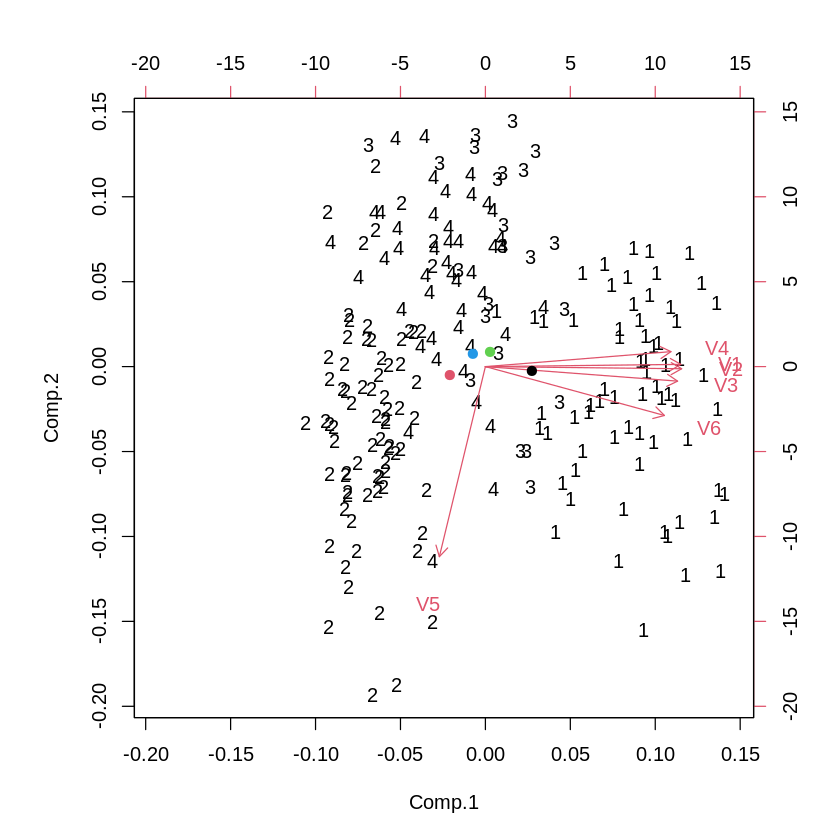

In [16]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 2 components: 

 log-likelihood   n df      BIC       ICL
       80.12963 210 49 -101.749 -104.2238

Clustering table:
  1   2 
 71 139 

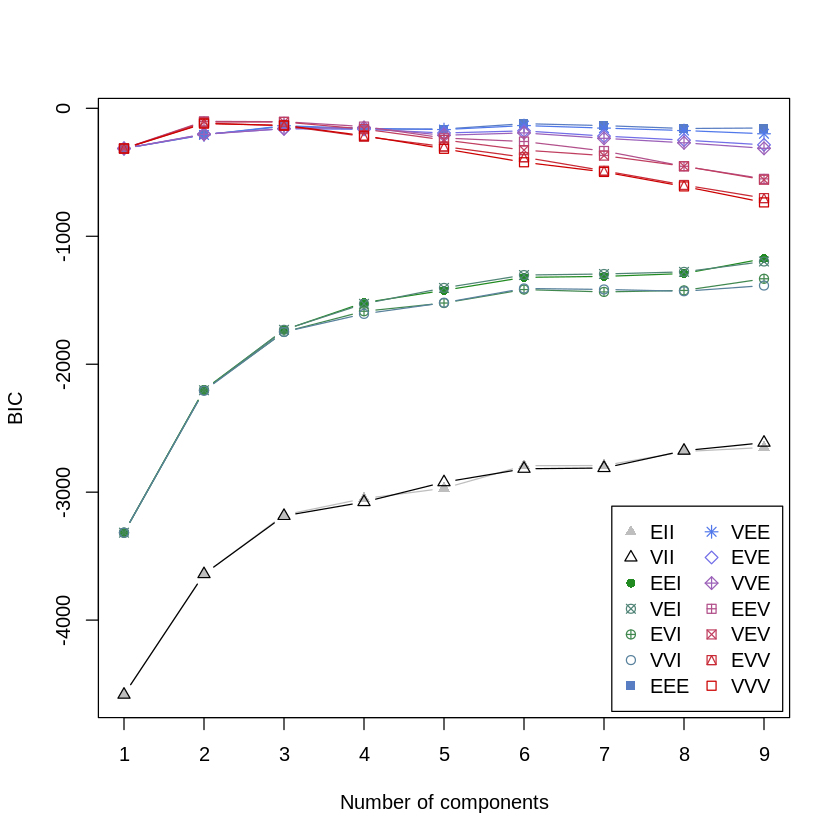

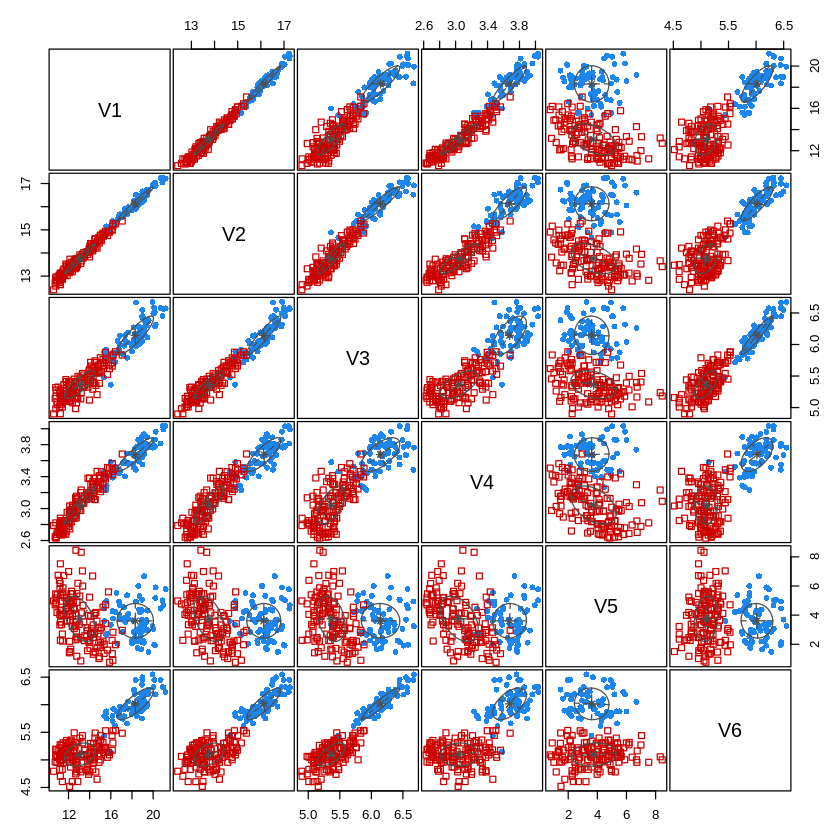

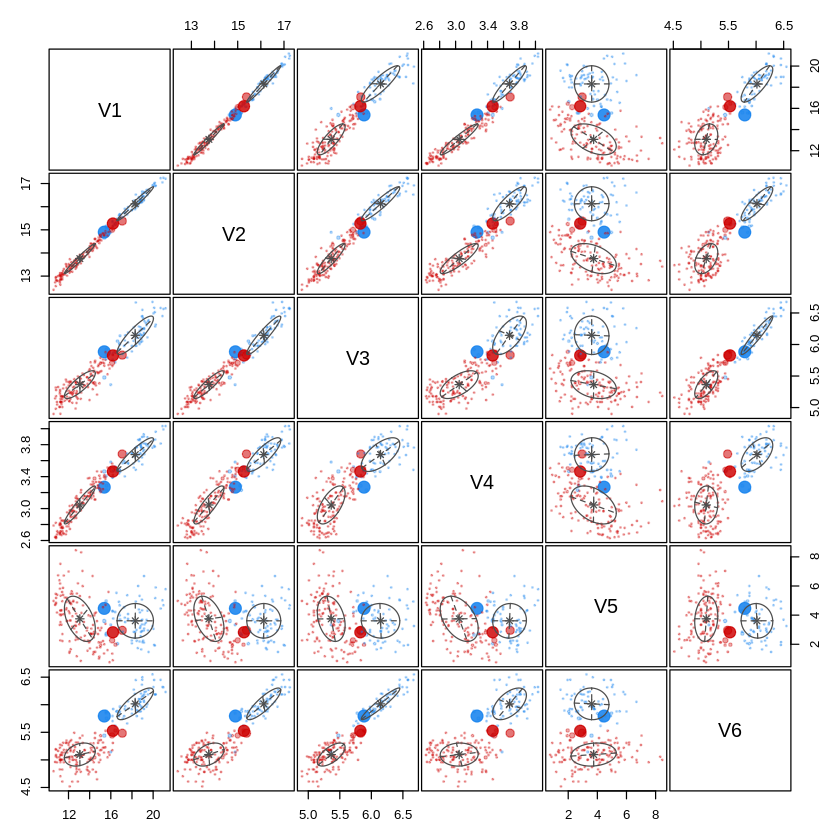

Bayesian Information Criterion (BIC): 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -4582.628 -4582.628 -3316.705 -3316.705 -3316.705 -3316.705 -314.1195
2 -3641.926 -3640.393 -2199.185 -2203.384 -2202.835 -2207.547 -205.9323
3 -3178.012 -3185.252 -1731.977 -1730.967 -1747.848 -1747.811 -141.2666
4 -3049.862 -3077.221 -1518.577 -1527.953 -1586.069 -1606.466 -162.7895
5 -2969.797 -2922.079 -1422.759 -1403.575 -1521.813 -1519.258 -161.9177
6 -2792.926 -2817.179 -1321.223 -1303.043 -1416.430 -1407.924 -119.9024
7 -2792.040 -2811.328 -1313.680 -1294.855 -1435.016 -1415.639 -135.2216
8 -2682.561 -2675.802 -1291.487 -1278.266 -1423.197 -1429.793 -157.7798
9 -2650.616 -2613.221 -1175.101 -1197.294 -1332.280 -1385.191 -153.9352
        VEE       EVE       VVE       EEV       VEV       EVV       VVV
1 -314.1195 -314.1195 -314.1195 -314.1195 -314.1195 -314.1195 -314.1195
2 -207.9041 -201.1549 -203.1254 -101.7490 -106.6346 -114.7325 -119.6948
3 -136.2400 -159.5662 -15

[1] 2

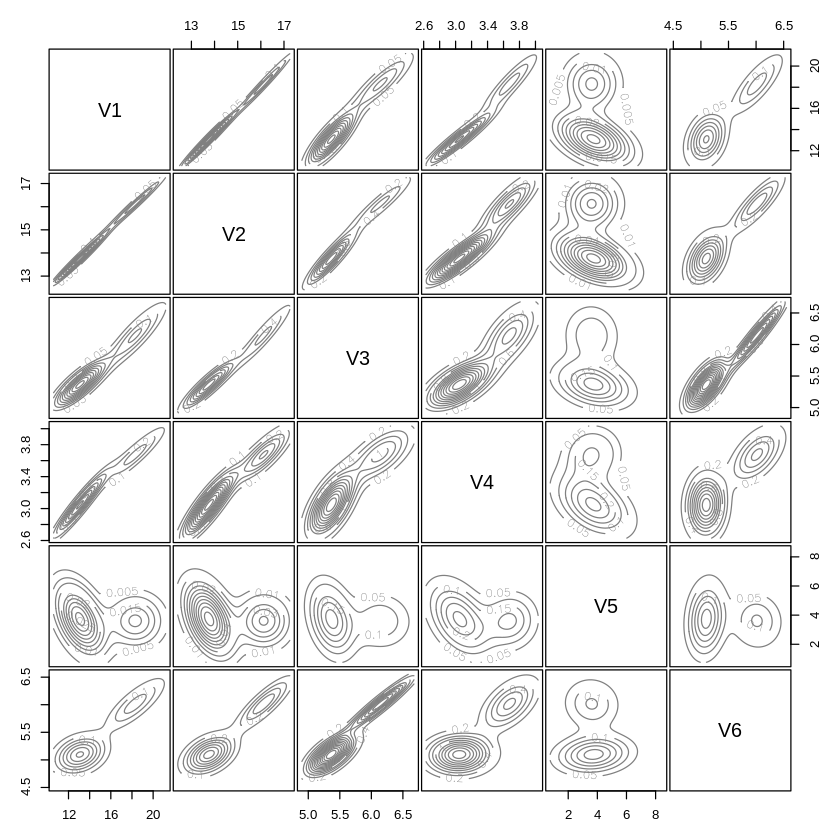

In [17]:
clus2 <- Mclust(datos) # sin definir número de grupos
summary(clus2)
plot(clus2)
clus2$BIC
clus2$G

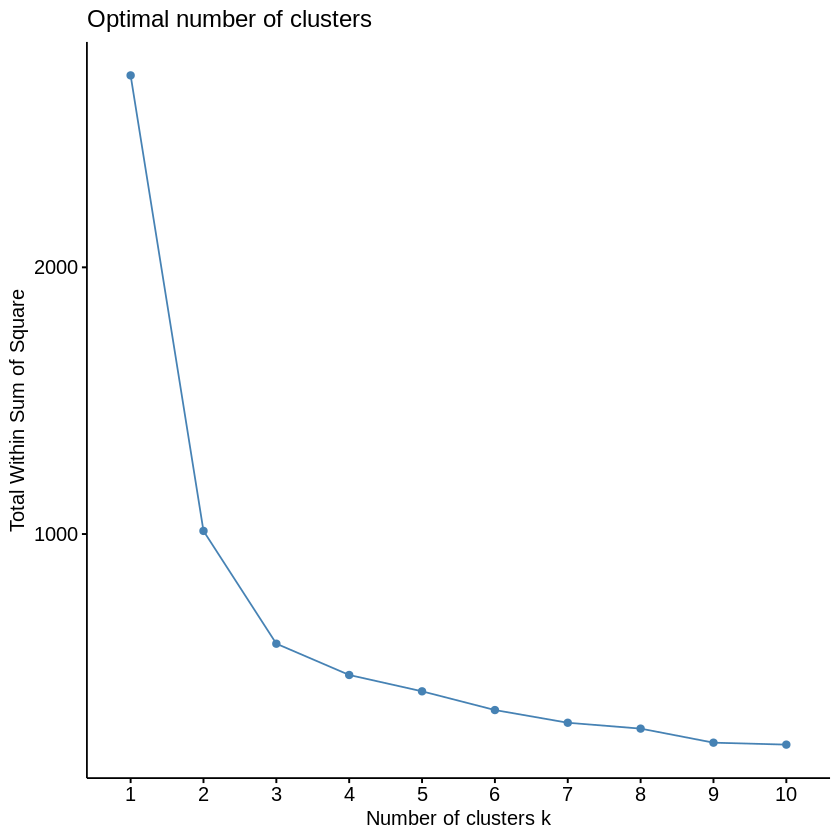

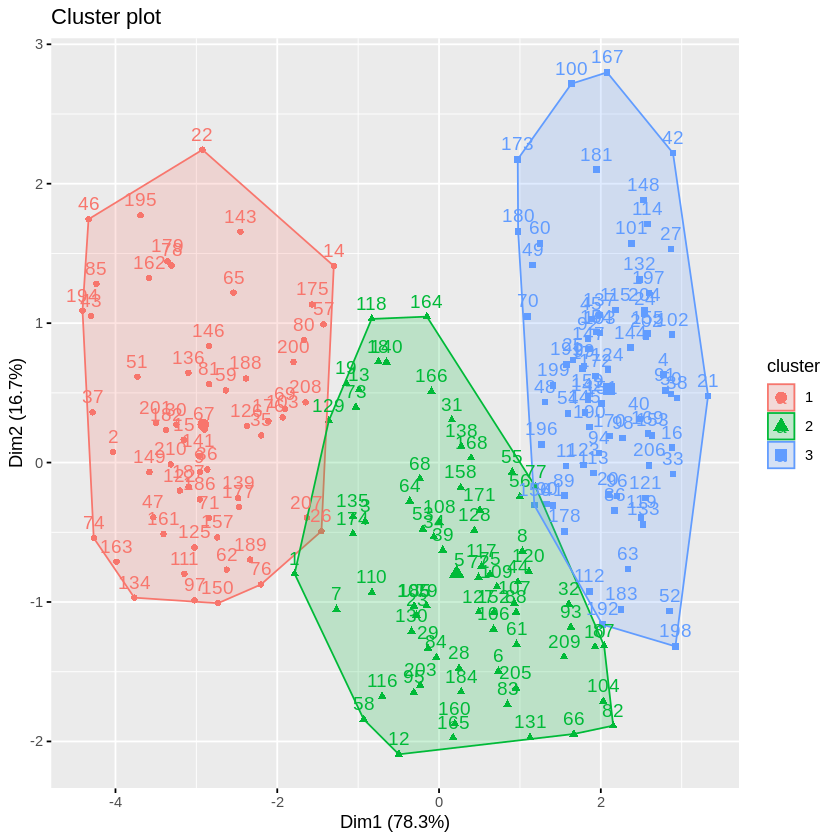

In [18]:
#install.packages("factoextra")
library(factoextra)
clus3 <- kmeans(datos , centers = 3, nstart = 10)
fviz_nbclust(datos, kmeans, method = "wss")
fviz_cluster(clus3, data = datos)

### Respuesta 2

2.a Según el Criterio de información Bayesiano el número óptimo de grupos es G=2, ya que, para esta cantidad de grupos obtentemos el mayor valor de BIC.

2.b Como se puede ver el número óptimo de grupos definidos por ambos algoritmos de agrupamiento son distintos, para GMM el valor óptimo de grupos es de G=2, mientras que con el método del codo podemos ver que un k óptimo para kmeans es k=3. Esto puede ser ya que mientras kmeans busca particiones basadas en distnacias euclideanas y asume grupos esfericos, con GMM se permiten formas elipticas y variabilidad en tamaño y orientación, lo que permite capturar estructuras posiblemente solapadas y como consecuencia definir menos cantidad de grupos.

**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [19]:
#help(hclust)

**Ejercicio 3:** 

a) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD) y resuma brevemente en que consisten.

#### Metodo Purity: 
Este método es una medida de evaluación externa utilizada en clustering para cuantificar qué tan bien los clusters obtenidos coinciden con una clasificación conocida. Evalúa el grado de homogeneidad de los clusters, es decir, qué proporción de los elementos en cada cluster pertenecen a la clase más común dentro de ese cluster.

Se calcula de la siguiente manera:

$$ Purity  =  \sum_{i} \frac{N_i}{N} p_{i} $$

Así. La pureza toma valores entre 0 (muy mala clasificación) y 1 (clasificación perfecta). Sin embargo, no penaliza por el número de clusters. Es decir, si pusiéramos cada punto en su propio cluster (uno por clase), se obtendría una pureza de 1, pero eso no significa que el clustering sea útil.

#### Método Rand Index
En este método se evalúa cuántos pares de elementos están de acuerdo o en desacuerdo entre dos asignaciones de clustering, considerando todas las posibles parejas de puntos, y así mirar la similitud entre las dos asignaciones de clustering.

Se calcula de la siguiente manera:

$$RI =  \frac{TP + TN}{TP + FP + FN + TN}$$

En donde:

$TP$ (True Positives): Número de pares que están en el mismo cluster

$TN$ (True Negatives): Pares que están en clusters diferentes

$FP$ (False Positives): Pares en el mismo cluster en U pero en clusters diferentes en V

$FN$ (False Negatives): Pares en clusters diferentes en U pero en el mismo cluster en V.

En donde U, es un Clustering generado y V, es un Clustering real o de referencia

Además, cuando:

$RI = 1$, indica una coincidencia perfecta entre el clustering y la referencia.

$RI = 0$, indica una discordancia total.

#### Método Mutual Information
Otra forma de medir la calidad de un clustering es calcular la información mutua entre U y V, es decir, ver la información en comun entre dos clusters.
Se define la probabilidad conjunta como la probabilidad de que un objeto elegido al azar pertenezca simultáneamente al clúster i en U y j en V

$$p_{ij} =  \frac{|U_i \cap V_j|}{N}$$

Asimismo, las probabilidades marginales para cada partición son:

$$p_i =\frac{|U_i|}{N} \mbox{  y   } p_j = \frac{|V_j|}{N} $$ 

Con lo cual, la información mutua se calcula de la siguiente manera:

$$MI = \sum_{i=1}^{R} \sum_{j=1}^{C} p_{ij} \log \left( \frac{p_{ij}}{p_i p_j} \right)$$

Los resultados provenientes de la formula, se pueden interpretar como:

Un valor minimo igual a 0: Esto ocurre cuando las particiones son completamente independientes: conocer un cluster de U no te da ninguna pista sobre el cluster en V. No hay información compartida.

Un valor máximo: Este valor va a depender de los datos, pero estos tipos de valores indican una mayor similitud entre los clusters, lo cual indican que puede haber mucha información compartida



-----------------------------------------------------------------------------------------------------------------------------------------------

Considere el archivo "semillas.txt" que contiene una séptima variable con la clasificación de las semillas en tres variedades: 
- 1: Kama
- 2: Rosa
- 3: Canadian

b) Calcule alguna de las medidas de calidad estudiadas para los agrupamientos obtenidos con  KMeans (tarea anterior) y GMM, considerando la etiqueta en V7 para sus cálculos. Compare y discuta sus resultados.

In [46]:
datos1 <-read.table("..//data//semillas.txt",dec=".")
summary(datos1)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6              V7   
 Min.   :0.765   Min.   :4.519   Min.   :1  
 1st Qu.:2.562   1st Qu.:5.045   1st Qu.:1  
 Median :3.599   Median :5.223   Median :2  
 Mean   :3.700   Mean   :5.408   Mean   :2  
 3rd Qu.:4.769   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :8.456   Max.   :6.550   Max.   :3  

In [51]:
#kmeans proveniente de la tarea anterior con k = 3
cl1 <- kmeans(datos,3,iter.max=1000,nstart=10)$cluster

clus <-Mclust(datos, G = 3)
cl2 <- clus$classification

In [52]:
tab1 <-table(datos1$V7, cl1)
tab2 <-table(datos1$V7, cl2)

tab1
tab2


   cl1
     1  2  3
  1 60  1  9
  2 10 60  0
  3  2  0 68

   cl2
     1  2  3
  1  0 13 57
  2 68  0  2
  3  0 70  0

In [53]:
purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}



In [54]:
purity(datos1$V7, cl1)
purity(datos1$V7, cl2)

[1] 0.8952381

[1] 0.9285714

Se evaluaron los dos métodos de agrupamiento no supervisado sobre el conjunto de datos de semillas, utilizando como referencia las clases verdaderas provistas en la columna V7. Para evaluar la calidad de los agrupamientos, se utilizó la medida $Purity$, una métrica que mide cuán bien coinciden los clusters generados con las clases reales.

Los resultados fueron:

$Pureza Kmeans =$ 0.895238095238095

$Pureza GMM =$ 0.928571428571429

La pureza más alta obtenida se puede apreciar que fue por el modelo GMM indicando que este método logró una mejor correspondencia con las clases verdaderas en comparación con KMeans, al estar más cercano al valor 1.